# Obtendo os dados (descompacte o arquivo dados.zip para ter acesso ao CSV `iml1_unidade1_dados.csv`)

In [26]:
import pandas as pd
df = pd.read_csv('iml1_unidade1_dados.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'iml1_unidade1_dados.csv'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Análise Descritiva

In [5]:
!pip install dataprep
from dataprep.eda import create_report
create_report(df)

^C


ModuleNotFoundError: No module named 'dataprep'

  Using cached dataprep-0.4.1-py3-none-any.whl.metadata (14 kB)
  Using cached bokeh-2.4.3-py3-none-any.whl.metadata (14 kB)
  Using cached Bottleneck-1.4.2-cp312-cp312-win_amd64.whl.metadata (7.9 kB)
  Using cached dask-2.30.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached Flask-1.1.4-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached ipywidgets-7.8.5-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached jsonpath_ng-1.7.0-py3-none-any.whl.metadata (18 kB)
  Using cached levenshtein-0.12.0.tar.gz (54 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached

  error: subprocess-exited-with-error
  
  × Building wheel for levenshtein (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [38 lines of output]
      C:\Users\Ronaldo\AppData\Local\Temp\pip-build-env-yg1je4ed\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License :: OSI Approved :: GNU General Public License v2 or later (GPLv2+)
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              ********************************************************************************
      
      !!
        self._finalize_license_expression()
      running bdist_wheel
      running build
      running build_py
     

In [591]:
#df = df[(df['bathrooms'] > 0)&(df['bedrooms'] > 0)&(df['price'] <= 1960000)]

# Análise Exploratória

### Correlação entre "price" e outras features:

In [6]:
df.corr(numeric_only=True)["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [7]:
import plotly.express as px

In [8]:
px.scatter(df, x='sqft_living', y='price')

In [9]:
px.box(df, x='grade', y='price')

In [10]:
px.scatter(df, x='sqft_above', y='price')

In [11]:
px.scatter(df, x='sqft_living15', y='price')

In [12]:
px.box(df, x='bathrooms', y='price')

# Remoção outlier

In [7]:
df['price'].quantile([
    0.0, 0.05, 0.1, 0.2, 0.3,  0.4,  0.5, 0.6, 0.7, 0.8, 0.9, 0.95, .97, 0.98, 0.99, 1],
    interpolation='lower')


0.00      75000.0
0.05     210000.0
0.10     245000.0
0.20     298450.0
0.30     345000.0
0.40     399500.0
0.50     450000.0
0.60     519000.0
0.70     595000.0
0.80     700000.0
0.90     887000.0
0.95    1156000.0
0.97    1388000.0
0.98    1600000.0
0.99    1960000.0
1.00    7700000.0
Name: price, dtype: float64

In [8]:
df_new = df[(df['bathrooms'] > 0)&(df['bedrooms'] > 0)&(df['price'] <= 1960000)]

In [9]:
df.shape

(21613, 21)

In [10]:
df_new.shape

(21380, 21)

# Divisão dos dados

In [11]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_new, test_size=0.2, random_state=0)

# Engenharia de recursos

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

transformer = ColumnTransformer([
    ('one_hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, min_frequency=0.01), ['zipcode']),
    ('numeric', MinMaxScaler(), ['sqft_living','grade', 'sqft_above', 'sqft_living15', 'bathrooms'])
])

In [13]:
X_train = transformer.fit_transform(df_train)
features = transformer.get_feature_names_out()
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(transformer.transform(df_test), columns=features)

In [14]:
y_train = df_train['price']
y_test = df_test['price']

# Seleção de modelos


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn import linear_model

import matplotlib.pyplot as plt
import numpy as np

## Regressão de linear

In [16]:
linear = linear_model.LinearRegression().fit(X_train, y_train)

In [17]:
{
    'Method': "Regressão Linear",
    'MSE': mean_squared_error(linear.predict(X_test), y_test),
    'MAE': mean_absolute_error(linear.predict(X_test), y_test),
    'MAPE': mean_absolute_percentage_error(linear.predict(X_test), y_test)
}

{'Method': 'Regressão Linear',
 'MSE': 18428768972.818054,
 'MAE': 93987.1889616464,
 'MAPE': 0.34835702904166643}

## Lasso

In [18]:
lasso = linear_model.LassoCV().fit(X_train,y_train)

In [19]:
{
    'Method': "Lasso",
    'MSE': mean_squared_error(lasso.predict(X_test), y_test),
    'MAE': mean_absolute_error(lasso.predict(X_test), y_test),
    'MAPE': mean_absolute_percentage_error(lasso.predict(X_test), y_test)
}

{'Method': 'Lasso',
 'MSE': 18442260827.74099,
 'MAE': 93935.16175462292,
 'MAPE': 0.2828511263345779}

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train,y_train)

In [21]:
{
    'Method': "Decision Tree",
    'MSE': mean_squared_error(tree.predict(X_test), y_test),
    'MAE': mean_absolute_error(tree.predict(X_test), y_test),
    'MAPE': mean_absolute_percentage_error(tree.predict(X_test), y_test)
}

{'Method': 'Decision Tree',
 'MSE': 31741229756.39677,
 'MAE': 113274.8463517306,
 'MAPE': 0.2322232341892009}

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor().fit(X_train,y_train)

In [23]:
{
    'Method': "Random Forest",
    'MSE': mean_squared_error(forest.predict(X_test), y_test),
    'MAE': mean_absolute_error(forest.predict(X_test), y_test),
    'MAPE': mean_absolute_percentage_error(forest.predict(X_test), y_test)
}

{'Method': 'Random Forest',
 'MSE': 17012987470.779402,
 'MAE': 84252.51885718858,
 'MAPE': 0.16282927065964228}

# Conclusão

## Entre os três modelos "Random Forest" nos dá o melhor resultado com "MAPE" de aproximadamente 0,16346.

## Visualização da predição e valores reais dos 100 primeiros dados do conjunto de teste:



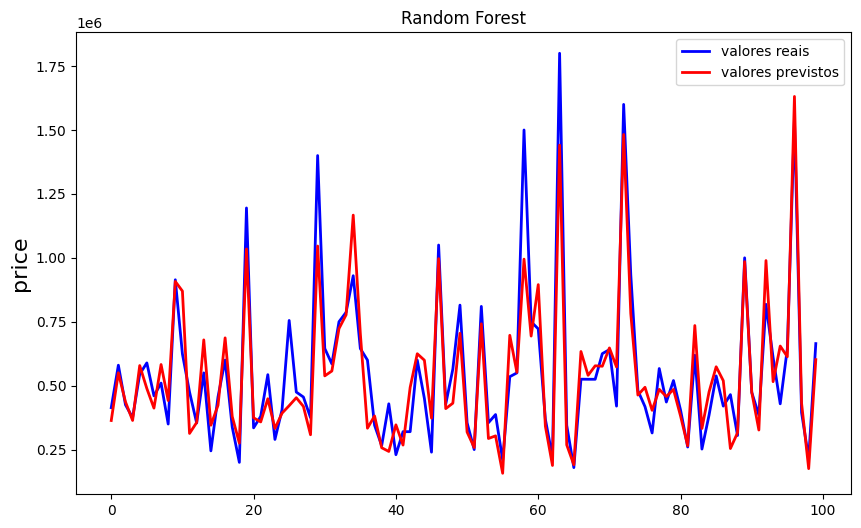

In [24]:
y_test1 = np.array(y_test)

some_values = X_test[:100]
y_pred_some_values = forest.predict(some_values)
y_true_some_values = y_test1[:100]

plt.figure(figsize = (10,6))
plt.plot(y_true_some_values, 'b', lw = 2, label = 'valores reais')
plt.plot(y_pred_some_values, 'r', lw = 2, label = 'valores previstos')
plt.ylabel('price', fontsize = 16)
plt.legend()
plt.title('Random Forest')
plt.show()

# Pipeline com pré-processamento + modelo salvo

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import joblib
import os

# Define colunas categóricas e numéricas
categorical = ['zipcode']
numeric = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']

# Cria transformador de colunas
preprocessor = ColumnTransformer([
    ('one_hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, min_frequency=0.01), categorical),
    ('numeric', MinMaxScaler(), numeric)
])

# Cria pipeline com transformador + modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Treina o pipeline diretamente nos dados brutos
X_train_raw = df_train[categorical + numeric]
y_train = df_train['price']

pipeline.fit(X_train_raw, y_train)

# Salva o pipeline completo
os.makedirs('../app', exist_ok=True)
joblib.dump(pipeline, '../app/model.joblib')

print("Pipeline com pré-processamento + modelo salvo em '../app/model.joblib'")

Pipeline com pré-processamento + modelo salvo em '../app/model.joblib'
